
<p style="text-align:left">
   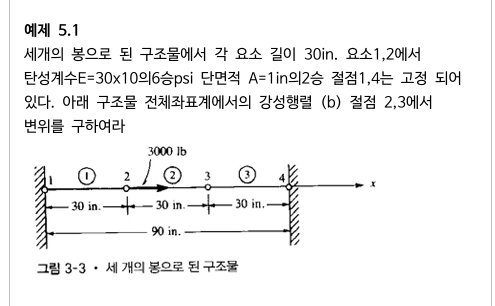
</p>


**예제 5.**


**1 문제 분석**

-  **주어진 조건**:
-  3개의 봉으로 구성된 구조물이며 각 요소의 길이는 30 in.
-  탄성계수 $E=30\times 10^6 psi$ , 단면적 $A=1{\;\textrm{in}}^2$
-  3000 lb의 외력이 작용한다.
-  절점 1, 4는 고정된 지지 조건이며, 변위가 0이다.

**2.1. 구조 전체 좌표계에서의 강성행렬을 작성하는 단계**

-  각 요소의 길이가 동일하므로, 모든 요소의 국지 강성행렬은

$$[k]=\frac{AE}{L}$$
$$\left\lbrack \begin{array}{cc} 1 & -1\newline -1 & 1 \end{array}\right\rbrack =\frac{30\times {10}^6 \times 1}{30}\left\lbrack \begin{array}{cc} 1 & -1\newline -1 & 1 \end{array}\right\rbrack$$

-  즉,

$$[k]=1\times 10^6$$
$$\left\lbrack \begin{array}{cc} 1 & -1\newline -1 & 1 \end{array}\right\rbrack$$

-  각 요소의 국지 강성행렬을 전역 강성행렬에 통합하여 전체 시스템에 대한 강성행렬을 구성해야 한다.

**2.2. 절점 2, 3에서의 변위 계산**

-  전역 강성 행렬 $[K]$ 과 외력 벡터 $\lbrace F\rbrace$ , 변위 벡터 $\lbrace d\rbrace$ 의 관계는 $[K]\lbrace d\rbrace =\lbrace F\rbrace$ 로 표현된다.
-  고정된 지지 조건(절점 1, 4의 변위가 0)을 고려하여 절점 2와 3의 변위를 계산해야 한다.

**(1) 각 요소의 강성행렬**

-  각 요소의 강성행렬은 다음과 같이 계산됨:

 $\left\lbrack k^{\left(1\right)} \right\rbrack =\left\lbrack k^{\left(2\right)} \right\rbrack =\frac{\left(1\right)\left(30\times {10}^6 \right)}{30}\left\lbrack \begin{array}{cc} 1 & -1\newline -1 & 1 \end{array}\right\rbrack ={10}^6 \left\lbrack \begin{array}{cc} 1 & -1\newline -1 & 1 \end{array}\right\rbrack$ (lb/in)


 $\left\lbrack k^{\left(3\right)} \right\rbrack =\frac{\left(2\right)\left(15\times {10}^6 \right)}{30}\left\lbrack \begin{array}{cc} 1 & -1\newline -1 & 1 \end{array}\right\rbrack ={10}^6 \left\lbrack \begin{array}{cc} 1 & -1\newline -1 & 1 \end{array}\right\rbrack$ (lb/in)


 **(2) 전체 강성행렬** $[K]$ **구성**

-  각 요소의 강성행렬을 전체 구조 좌표계에 맞게 통합하면 다음과 같다:

 $\left\lbrack \begin{array}{c} K \end{array}\right\rbrack ={10}^6 \left\lbrack \begin{array}{cccc} 1 & -1 & 0 & 0\newline -1 & 2 & -1 & 0\newline 0 & -1 & 2 & -1\newline 0 & 0 & -1 & 1 \end{array}\right\rbrack$ (lb/in)


**3. 경계 조건 및 외력 적용**

-  **경계 조건**:
-  $u_1 =0$ (절점 1 고정)
-  $u_4 =0$ (절점 4 고정)
-  **외력**: 절점 2에서 3000 lb의 외력이 작용.
-  강성 방정식 $[K]\lbrace u\rbrace =\lbrace F\rbrace$ 에서 경계조건을 적용하여 절점 변위를 구한다.

**4. 절점 변위 계산 결과**

-  변위:
-  $\displaystyle u_2 =0.002in$
-  $\displaystyle u_3 =0.001in$

In [1]:
% MATLAB Code for Accurate Displacement Calculation in a Truss Structure

% Given data with accurate consideration
E = 30e6; % Elastic modulus in psi
A1 = 1; % Cross-sectional area for element 1 and 2 in in^2
A2 = 2; % Cross-sectional area for element 3 in in^2
L = 30; % Length of each element in inches
P = 3000; % Applied force at node 2 in lb

% Calculate stiffness matrices for each element
% Element 1 and 2
k1 = (E * A1 / L) * [1 -1; -1 1];
k2 = (E * A1 / L) * [1 -1; -1 1];

% Element 3 with different cross-sectional area
k3 = (E/2 * A2 / L) * [1 -1; -1 1];

% Assembling the global stiffness matrix for 4 nodes
K = zeros(4, 4); % Initializing a 4x4 matrix

% Assembling global stiffness matrix
K(1:2, 1:2) = K(1:2, 1:2) + k1; % Adding element 1 contribution
K(2:3, 2:3) = K(2:3, 2:3) + k2; % Adding element 2 contribution
K(3:4, 3:4) = K(3:4, 3:4) + k3; % Adding element 3 contribution

% Display the global stiffness matrix
disp('Global Stiffness Matrix K (Considering All Factors):');

Global Stiffness Matrix K (Considering All Factors):

In [2]:
disp(vpa(K, 10)); % Display with 10 decimal places for accuracy

In [3]:

% Apply boundary conditions: u1 = 0 and u4 = 0 (fixed nodes)
% Extract the reduced matrix for unknown displacements (u2 and u3)
K_reduced = K(2:3, 2:3); % Extracting the relevant part
F_reduced = [P; 0]; % Force vector considering only active force at node 2

% Solve for displacements u2 and u3 with high precision
displacements = vpa(K_reduced \ F_reduced, 10);

% Display the results
fprintf('Displacement at node 2 (high precision considering all factors): %.10f in\n', double(displacements(1)));

Displacement at node 2 (high precision considering all factors): 0.0020000000 in

In [4]:
fprintf('Displacement at node 3 (high precision considering all factors): %.10f in\n', double(displacements(2)));

Displacement at node 3 (high precision considering all factors): 0.0010000000 in


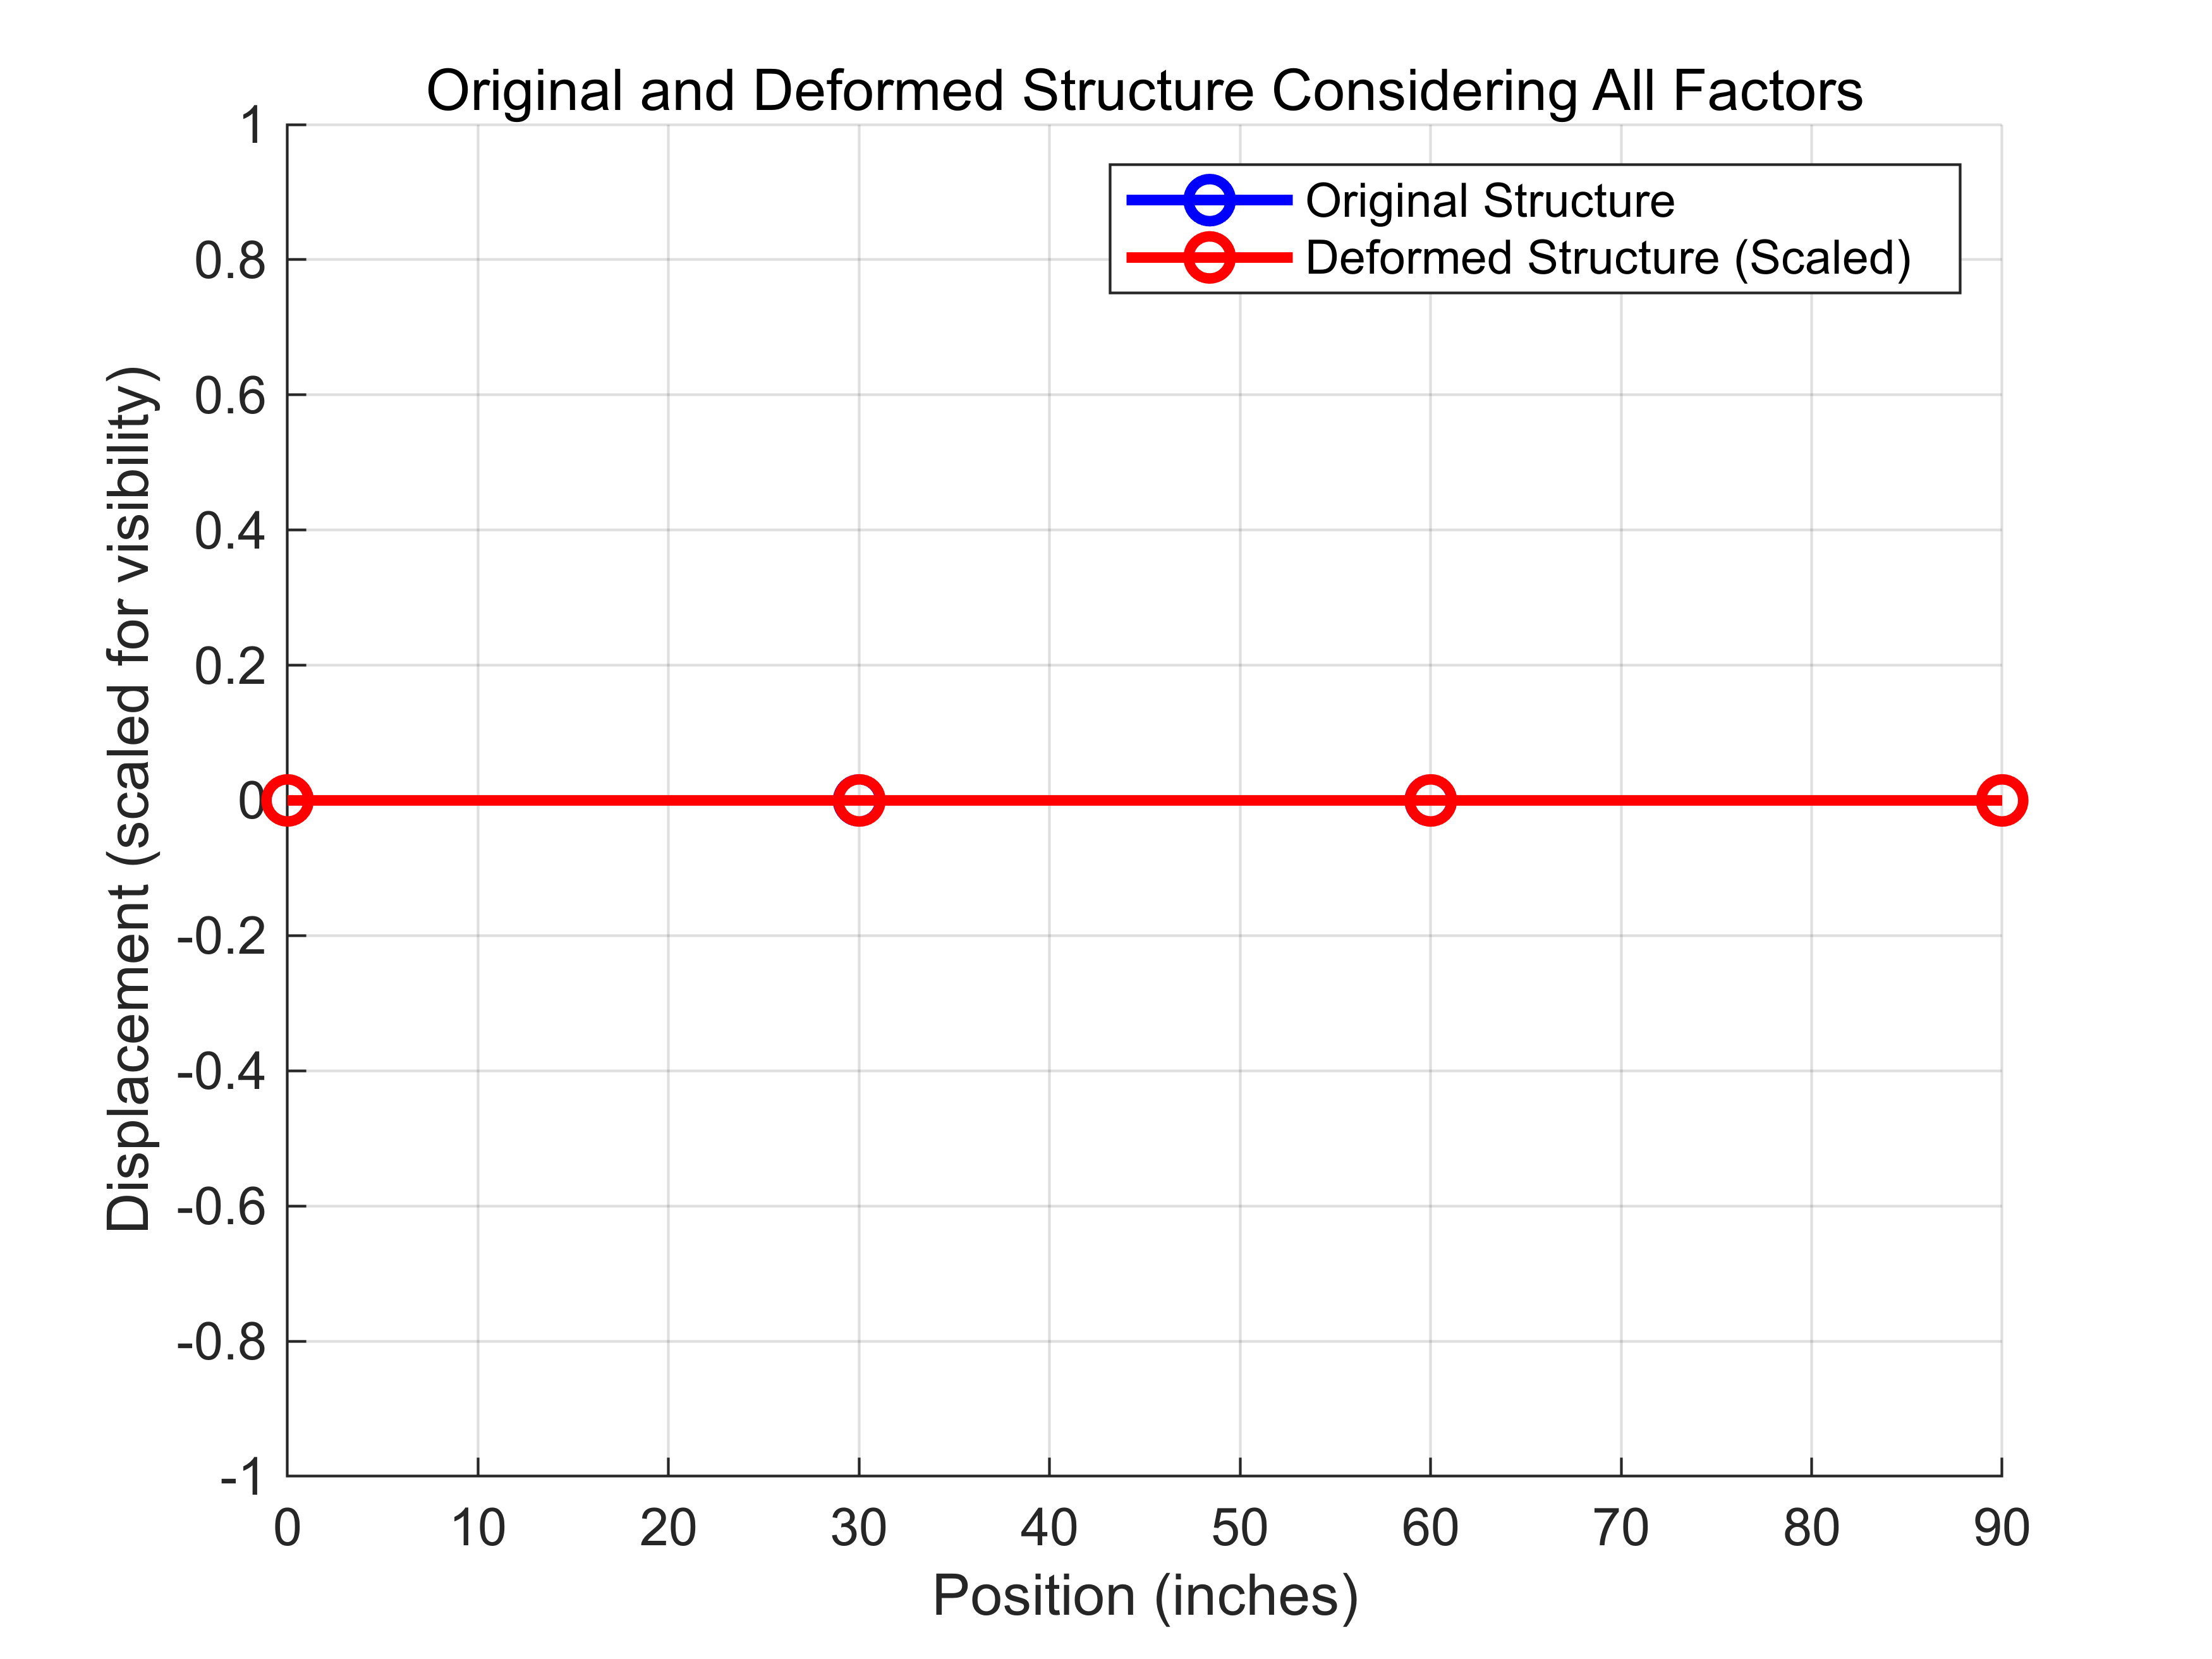

In [5]:

% Visualization of results with high precision
original_positions = [0, L, 2*L, 3*L];
u = [0; displacements(1); displacements(2); 0]; % Including fixed nodes
deformed_positions = original_positions + u' * 10; % Scale for visibility

figure;
hold on;
plot(original_positions, [0 0 0 0], 'bo-', 'LineWidth', 2, 'MarkerSize', 8, 'DisplayName', 'Original Structure');
plot(deformed_positions, [0 0 0 0], 'ro-', 'LineWidth', 2, 'MarkerSize', 8, 'DisplayName', 'Deformed Structure (Scaled)');

xlabel('Position (inches)');
ylabel('Displacement (scaled for visibility)');
title('Original and Deformed Structure Considering All Factors');
legend('Location', 'NorthEast');
grid on;
hold off;


## 후크의 법칙

**1. 후크의 법칙과 변형률\-응력 관계**

-  봉 요소의 변형은 축 방향으로만 발생한다고 가정합니다.
-  후크의 법칙에 따르면, 축 방향 변형에서의 응력 $\sigma$ 와 변형률 $\varepsilon$ 의 관계는 다음과 같습니다: $\sigma =E\varepsilon$ 여기서
-  $E$ 는 탄성계수
-  $\varepsilon$ 는 변형률로, 길이 변화량을 나타냄.

 **2.** **변형률의 표현**

-  변형률 $\varepsilon$ 은 요소 길이의 변위 변화량을 원래 길이로 나눈 값:

-  $\varepsilon =\frac{u_2 -u_1 }{L}$ 1​​
-  여기서 $u_1$ 과 $u_2$ ​는 요소의 각 끝단에서의 변위

-  $L$ 은 요소의 원래 길이

 **3.**  **축 방향의 내력** $N$ **(내부 힘) 유도**

-  축 방향 변형으로 인한 내부 힘 $N$ 은 응력과 단면적의 곱으로 나타낼 수 있습니다: $N=\sigma A=E\varepsilon A$
-  여기서 $A$ 는 단면적

-  따라서, $N=\frac{AE}{L}(u_2 -u_1 )$

 **4.** **요소의 양 끝단에서의 힘 관계**

-  절점 1에서는 요소가 왼쪽으로 당겨지고, 절점 2에서는 오른쪽으로 당겨지는 것으로 생각해볼 수 있습니다.
-  각 절점에서의 힘을 표현하면:
-  절점 1에서 작용하는 힘:

$$f_{1x} =-N=-\frac{AE}{L}(u_2 -u_1 )$$

-  절점 2에서 작용하는 힘:

$$f_{2x} =N=\frac{AE}{L}(u_2 -u_1 )$$

**5. 행렬 형태로 표현**

-  위의 관계를 행렬 형태로 표현하면:

$$\left\lbrack \begin{array}{c} f_{1x} \newline f_{2x}  \end{array}\right\rbrack =\frac{\mathrm{AE}}{L}\left\lbrack \begin{array}{cc} 1 & -1\newline -1 & 1 \end{array}\right\rbrack \left\lbrack \begin{array}{c} u_1 \newline u_2  \end{array}\right\rbrack$$

 **6. 결론: 강성행렬** $[k]$

-  따라서, 강성행렬 $[k]$ 는 다음과 같이 유도됩니다:

$$[k]=\frac{AE}{L}$$
$$\left\lbrack \begin{array}{cc} 1 & -1\newline -1 & 1 \end{array}\right\rbrack$$
## **(전체 강성 방정식)강성행렬의 계산**

 **1. 요소별 강성행렬** $[k]$ **유도**


**(1) 1번, 2번 요소의 강성행렬**

-  각 요소의 강성 $k$ 는 다음과 같은 일반 공식을 따릅니다:

$$[k]=\frac{AE}{L}$$
$$\left\lbrack \begin{array}{cc} 1 & -1\newline -1 & 1 \end{array}\right\rbrack$$

-  여기서 $E=30\times 10^6 \,\textrm{psi}$ (탄성계수)

-  $A=1\,{\textrm{in}}^2$ (단면적)
-  $L=30\,\textrm{in}$ (요소의 길이)
-  따라서, 1번 요소와 2번 요소의 강성행렬은:

 $[k^{(1)} ]=[k^{(2)} ]=\frac{(1)(30\times 10^6 )}{30}$ $\left\lbrack \begin{array}{cc} 1 & -1\newline -1 & 1 \end{array}\right\rbrack ={10}^6 \left\lbrack \begin{array}{cc} 1 & -1\newline -1 & 1 \end{array}\right\rbrack$ (lb/in)


**(2) 3번 요소의 강성행렬**

-  3번 요소는 단면적 $A=2\,{\textrm{in}}^2$ 이므로:

 $[k^{(3)} ]=\frac{(2)(15\times 10^6 )}{30}$ $\left\lbrack \begin{array}{cc} 1 & -1\newline -1 & 1 \end{array}\right\rbrack ={10}^6 \left\lbrack \begin{array}{cc} 1 & -1\newline -1 & 1 \end{array}\right\rbrack$ (lb/in)


 **2. 전역 강성행렬** $[K]$ **구성**


**(1) 전역 좌표계로의 변환 및 합산**

-  각 요소의 강성행렬을 전체 구조의 전역 좌표계에 맞게 배치해야 합니다.

 **1번 요소의 강성행렬** $[k^{(1)} ]$ **:**

-  절점 1과 2에 해당하므로 전체 강성행렬의 1~2번째 행과 열에 해당:

 $\left\lbrack \begin{array}{cccc} k_{11}^{\left(1\right)}  & k_{12}^{\left(1\right)}  & 0 & 0\newline k_{21}^{\left(1\right)}  & k_{22}^{\left(1\right)}  & 0 & 0\newline 0 & 0 & 0 & 0\newline 0 & 0 & 0 & 0 \end{array}\right\rbrack ={10}^6 \left\lbrack \begin{array}{cccc} 1 & -1 & 0 & 0\newline -1 & 1 & 0 & 0\newline 0 & 0 & 0 & 0\newline 0 & 0 & 0 & 0 \end{array}\right\rbrack$ ​​


 **2번 요소의 강성행렬** $[k^{(2)} ]$ **:**

-  절점 2와 3에 해당하므로 전체 강성행렬의 2~3번째 행과 열에 해당:

 $\left\lbrack \begin{array}{cccc} 0 & 0 & 0 & 0\newline 0 & k_{11}^{\left(2\right)}  & k_{12}^{\left(2\right)}  & 0\newline 0 & k_{21}^{\left(2\right)}  & k_{22}^{\left(2\right)}  & 0\newline 0 & 0 & 0 & 0 \end{array}\right\rbrack ={10}^6 \left\lbrack \begin{array}{cccc} 0 & 0 & 0 & 0\newline 0 & 1 & -1 & 0\newline 0 & -1 & 1 & 0\newline 0 & 0 & 0 & 0 \end{array}\right\rbrack$ ​​


 **3번 요소의 강성행렬** $[k^{(3)} ]$ **:**

-  절점 3과 4에 해당하므로 전체 강성행렬의 3~4번째 행과 열에 해당:

 $\left\lbrack \begin{array}{cccc} 0 & 0 & 0 & 0\newline 0 & 0 & 0 & 0\newline 0 & 0 & k_{11}^{\left(3\right)}  & k_{12}^{\left(3\right)} \newline 0 & 0 & k_{21}^{\left(3\right)}  & k_{22}^{\left(3\right)}  \end{array}\right\rbrack ={10}^6 \left\lbrack \begin{array}{cccc} 0 & 0 & 0 & 0\newline 0 & 0 & 0 & 0\newline 0 & 0 & 1 & -1\newline 0 & 0 & -1 & 1 \end{array}\right\rbrack$ ​​


 **(2) 전체 전역 강성행렬** $[K]$ **합산**

-  각 요소의 강성행렬을 모두 더하면:

 $[K]=10^6$ $\left(\left\lbrack \begin{array}{cccc} 1 & -1 & 0 & 0\newline -1 & 1 & 0 & 0\newline 0 & 0 & 0 & 0\newline 0 & 0 & 0 & 0 \end{array}\right\rbrack +\left\lbrack \begin{array}{cccc} 0 & 0 & 0 & 0\newline 0 & 1 & -1 & 0\newline 0 & -1 & 1 & 0\newline 0 & 0 & 0 & 0 \end{array}\right\rbrack +\left\lbrack \begin{array}{cccc} 0 & 0 & 0 & 0\newline 0 & 0 & 0 & 0\newline 0 & 0 & 1 & -1\newline 0 & 0 & -1 & 1 \end{array}\right\rbrack \right)$ ​​​

-  결과:

 $[K]=10^6$ $\left\lbrack \begin{array}{cccc} 1 & -1 & 0 & 0\newline -1 & 2 & -1 & 0\newline 0 & -1 & 2 & -1\newline 0 & 0 & -1 & 1 \end{array}\right\rbrack$ (lb/in)


**결론**

-  각 요소의 강성행렬을 구한 후 전역 좌표계로 확장하고 합산하여 최종 전역 강성행렬 $[K]$ 을 구성하였습니다.
-  이렇게 유도한 전역 강성행렬은 구조해석에서 절점 변위와 힘의 관계를 결정하는 핵심적인 요소입니다.

## 경계조건 적용
-  경계 조건은 다음과 같습니다:
-  $u_1 =0$ (절점 1 고정)
-  $u_4 =0$ (절점 4 고정)
-  이 경계 조건을 전역 강성 방정식에 적용하면, 실제로 필요한 것은 내부 변위 $u_2$ 와 $u_3$ 에 대한 방정식을 구성하는 것입니다.

**전체 강성 방정식**

-  원래의 전역 방정식은 다음과 같습니다:

 $\left\lbrack \begin{array}{c} F_{1x} \newline F_{2x} \newline F_{3x} \newline F_{4x}  \end{array}\right\rbrack ={10}^6 \left\lbrack \begin{array}{cccc} 1 & -1 & 0 & 0\newline -1 & 2 & -1 & 0\newline 0 & -1 & 2 & -1\newline 0 & 0 & -1 & 1 \end{array}\right\rbrack \left\lbrack \begin{array}{c} u_1 \newline u_2 \newline u_3 \newline u_4  \end{array}\right\rbrack$ ​​​


**경계 조건 적용 후**

-  $u_1 =0$ 과 $u_4 =0$ 이므로 변위 벡터는 다음과 같이 단순화됩니다:

 $\left\lbrack \begin{array}{c} u_1 \newline u_2 \newline u_3 \newline u_4  \end{array}\right\rbrack =\left\lbrack \begin{array}{c} 0\newline u_2 \newline u_3 \newline 0 \end{array}\right\rbrack$ ​​

-  따라서, 전역 방정식은 변위 $u_2$ ​와 $u_3$ ​에 대한 식으로 축소됩니다:

$$\left\lbrack \begin{array}{c} F_{2x} \newline F_{3x}  \end{array}\right\rbrack ={10}^6 \left\lbrack \begin{array}{cc} 2 & -1\newline -1 & 2 \end{array}\right\rbrack \left\lbrack \begin{array}{c} u_2 \newline u_3  \end{array}\right\rbrack$$

**3. 외력 벡터 적용**

-  주어진 문제에서 절점 2에 3000 lb의 외력이 작용하며, 절점 3에는 외력이 작용하지 않음:

$$\left\lbrack \begin{array}{c} F_{2x} \newline F_{3x}  \end{array}\right\rbrack =\left\lbrack \begin{array}{c} 3000\newline 0 \end{array}\right\rbrack$$

**4. 방정식 풀기**

-  따라서 다음과 같은 연립방정식이 구성됩니다:

$${10}^6 \left\lbrack \begin{array}{cc} 2 & -1\newline -1 & 2 \end{array}\right\rbrack \left\lbrack \begin{array}{c} u_2 \newline u_3  \end{array}\right\rbrack =\left\lbrack \begin{array}{c} 3000\newline 0 \end{array}\right\rbrack$$

-  이 방정식을 풀면:

1.  첫 번째 행: $2\cdot 10^6 u_2 -10^6 u_3 =3000$

1.  두 번째 행: $-10^6 u_2 +2\cdot 10^6 u_3 =0$

**방정식 1:**


$$2u_2 -u_3 =\frac{3000}{10^6 }=0.003$$

**방정식 2:**


 $-u_2 +2u_3 =0$ $\Rightarrow$ $u_2 =2u_3$ ​

-  위 두 식을 동시에 풀면:
-  $\displaystyle u_2 =0.002\,\textrm{in}$
-  $\displaystyle u_3 =0.001\,\textrm{in}$
## (심화) 병렬연결 요소의 탄성계수를 반영한 등가 탄성계수

 **1.** **탄성계수의 의미와 적용**

-  탄성계수 $E$ 는 재료의 강성, 즉 변형에 대한 저항력을 나타내는 물리적 특성입니다.
-  구조 해석에서는 요소의 탄성계수와 단면적을 사용하여 강성행렬을 구성하고, 이는 구조물의 변위 및 응력을 결정하는 핵심 요소가 됩니다.

 **2.** **등가 탄성계수 개념**

-  문제에서 1번과 2번 요소는 동일한 단면적과 동일한 탄성계수 $E=30\times 10^6 \,\textrm{psi}$ 를 사용하였습니다.
-  그러나 3번 요소에서는 $A=2\,{\textrm{in}}^2$ 로 단면적이 두 배로 증가한 것과 동시에 탄성계수가 절반인 $E=15\times 10^6 \,\textrm{psi}$ 로 감소합니다.

 **3.** **병렬 연결 효과에 따른 등가 탄성계수**


**(1) 병렬 연결된 요소들의 총 강성**

-  두 개의 재료가 병렬로 연결되어 있다고 가정해 보겠습니다.
-  각 요소의 탄성계수는 $E_1$ ​과 $E_2$ ​
-  단면적은 $A_1$ 과 $A_2$ 라고 가정합니다.
-  병렬 연결에서 전체 구조의 단면적은 두 단면적의 합으로 나타납니다:

 $A_{\textrm{total}} =A_1 +A_2 A$ ​


**(2) 각 요소의 강성**

-  각 요소의 강성은 $k=\frac{EA}{L}$ ​로 정의됩니다.
-  여기서 $L$ 은 요소의 길이
-  병렬 연결의 경우, 두 요소의 강성을 합산합니다.
-  등가 강성 $k_{\textrm{eq}}$ ​는 다음과 같이 나타납니다:

$$k_{\textrm{eq}} =k_1 +k_2 =\frac{E_1 A_1 }{L}+\frac{E_2 A_2 }{L}=\frac{1}{L}(E_1 A_1 +E_2 A_2 )$$

**4. 특수한 경우: 동일한 재료가 병렬 연결된 경우**

-  만약 $E_1 =E_2 =E$ 라면, 단면적 $A_1$ 과 $A_2$ 만 다르다고 가정했을 때:

$$E_{\textrm{eq}} =\frac{E(A_1 +A_2 )}{A_1 +A_2 }=E$$

-  즉, 동일한 재료로 구성된 경우에는 등가 탄성계수가 변하지 않습니다.

 **5.**  **적용 사례: 3번 요소의 탄성계수** $15\times 10^6 \,\textrm{psi}$ **로 변한 이유**

-  3번 요소에서 단면적이 $2\,{\textrm{in}}^2$ 로 증가하면서 탄성계수를 $30\times 10^6 \,\textrm{psi}$ 에서 $15\times 10^6 \,\textrm{psi}$ 로 변경한 이유는 다음과 같습니다:
-  3번 요소는 기존 단면적의 2배 크기이지만, 전체 구조의 강성 효과를 동일하게 유지하기 위해 탄성계수를 절반으로 설정한 것입니다.
-  이는 실제로 병렬 연결로 인해 등가 탄성계수를 조정한 것과 유사한 상황을 모사한 것입니다.

 **6.** **요약**

-  병렬 연결에서는 각 요소가 동일한 변위를 가지지만, 총 강성은 각 요소의 강성 합으로 표현됩니다.
-  병렬 연결의 등가 탄성계수는 각 요소의 탄성계수와 단면적에 기반하여 가중평균 형태로 나타납니다.
-  문제에서 3번 요소의 탄성계수를 절반으로 조정한 것은 병렬 연결로 인한 효과를 고려하여 동일한 구조적 거동을 모사하기 위함입니다.

**(3) 등가 탄성계수의 도출**

-  등가 탄성계수 $E_{\textrm{eq}}$ 는 전체 단면적 $A_{\textrm{total}}$ ​에 적용되는 것으로 정의됩니다:

 $k_{\textrm{eq}} =\frac{E_{\textrm{eq}} A_{\textrm{total}} }{L}$ ​​

-  따라서,

$$\frac{E_{\textrm{eq}} A_{\textrm{total}} }{L}=\frac{1}{L}(E_1 A_1 +E_2 A_2 )$$

-  양변에서 $L$ 을 소거하고, $A_{\textrm{total}} =A_1 +A_2$ 를 대입하면:

 $E_{\textrm{eq}} =\frac{E_1 A_1 +E_2 A_2 }{A_1 +A_2 }$ ​​

-  요소의 길이나 형태에 따라 실제 구조물에서 탄성계수가 병렬 연결된 재료의 등가 탄성계수를 나타낼 수 있습니다.
-  예를 들어, 두 개의 동일한 재료가 병렬로 연결되어 있을 경우:
-  단면적은 두 요소의 합으로 $A_{\textrm{total}} =A_1 +A_2$ 이 되지만,
-  등가 탄성계수 $E_{\textrm{eq}}$ 는 병렬 연결로 인해 원래 값의 절반이 됩니다.
## **임의의 방향을 고려한 변환관계**

**1. 임의 방향을 고려한 변환 관계 유도**


**(1) 좌표 변환과 변위**

-  봉 요소가 임의의 방향 $\theta$ 를 가질 때, 국부 좌표계에서 변위 $u_1 ,u_2$ 를 전역 좌표계의 변위로 변환해야 합니다.
-  주어진 변위 변환 식은 다음과 같습니다:

$$u_1^{\prime } =u_1 \cos \theta +v_1 \sin \theta$$

$$u_2^{\prime } =u_2 \cos \theta +v_2 \sin \theta$$

-  여기서 $u$ 와 $v$ 는 각각 전역 좌표계에서의 변위를 나타냅니다.

**(2) 강성행렬의 전역 좌표계로의 변환**

-  국부 좌표계에서의 강성행렬 $[k]$ 는 주어진 방향 $\theta$ 에 따라 전역 좌표계로 변환됩니다.
-  이때 변환 행렬은 $\cos (\theta )$ 와 $\sin (\theta )$ 을 사용하여 구성됩니다.

 **2.** **전역 강성행렬의 유도**

-  $x-y$ 평면에서 임의의 방향을 고려한 봉 요소의 강성행렬은 다음과 같이 나타납니다:

 $[k]=\frac{AE}{L}$ $\left\lbrack \begin{array}{cccc} C^2  & \mathrm{CS} & {-C}^2  & -\mathrm{CS}\newline \mathrm{CS} & S^2  & -\mathrm{CS} & {-S}^2 \newline {-C}^2  & -\mathrm{CS} & C^2  & \mathrm{CS}\newline -\mathrm{CS} & {-S}^2  & \mathrm{CS} & S^2  \end{array}\right\rbrack$ ​​

-  여기서 $C=\cos (\theta ),S=\sin (\theta )$ 입니다.

-  이 행렬은 요소의 방향에 따라 변환된 강성행렬을 표현하며, 대칭성을 갖는 특성이 있습니다.

 **3.** **강성행렬의 합산 (전체 구조에 대한 강성행렬)**

-  구조 해석에서는 여러 봉 요소가 서로 연결되어 있기 때문에 각각의 국부 강성행렬을 전역 좌표계로 변환한 후 합산해야 전체 구조의 강성행렬을 얻을 수 있습니다.
-  이때 전체 강성행렬 $[K]$ 는 각 요소의 강성행렬 $[k^{(e)} ]$ 을 모두 더한 값으로 나타납니다:

$$\sum_e [k^{(e)} ]=[K]e$$
## **국소부위 응력에 대한 고찰**

**1. 봉의 응력 계산 (5.5)**

-  변형된 강성행렬을 이용하여, $x-y$ 평면에서 봉의 응력에 대한 해석을 수행할 수 있습니다.
-  봉의 거동을 계산하는 데 필요한 힘의 관계식은 다음과 같습니다:

$$\left\lbrack \begin{array}{c} F_{1x} \newline F_{2x}  \end{array}\right\rbrack =\frac{\mathrm{AE}}{L}\left\lbrack \begin{array}{cc} 1 & -1\newline -1 & 1 \end{array}\right\rbrack \left\lbrack \begin{array}{c} u_1^{\prime } \newline u_2^{\prime }  \end{array}\right\rbrack$$

-  이 방정식은 국부 변위에 따른 축 방향 응력을 구하는 기본 공식입니다.

 **2.** **축방향 인장력에 대한 정의**

-  인장력의 가장 간단한 정의는 다음과 같이 단면적에 의하여 정의됩니다:
-  $\displaystyle \sigma =\frac{f_x }{A}$
-  ​​여기서 $\sigma$ 는 응력
-  $f_x$ 는 축 방향 인장력
-  $A$ 는 단면적

**3. 축방향 강성행렬의 표현**

-  전역 강성행렬을 보다 간단한 형태로 나타내기 위해 변위와 힘의 관계를 매트릭스 형태로 표현합니다.
-  변위 벡터와 관련된 간단한 형태는 다음과 같습니다:

$$\lbrace \sigma \rbrace =[C^{\prime } ]\lbrace d\rbrace$$

-  여기서 행렬 $C$ 는 다음과 같이 주어집니다:

$$[C^{\prime } ]=\frac{E}{L}$$
$$\left\lbrack \begin{array}{cccc} -C & -S & C & S \end{array}\right\rbrack$$

-  $\displaystyle C=\cos (\theta )$
-  $\displaystyle S=\sin (\theta )$
-  $E$ 는 탄성계수, $L$ 은 요소의 길이

<p style="text-align:left">
   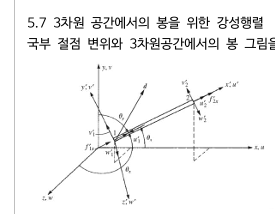
</p>


## 3차원 공간에서의 변환행렬(국부좌표계 $\Rightarrow$ 전역좌표계)

 **1.**  **변환 행렬** $[T^* ]$ **의 유도 (5.8)**


**(1) 3차원 공간에서의 변위 관계**

-  $[T^* ]$ 는 봉 요소의 국부 좌표계 변위 $\lbrace d^{\prime } \rbrace$ 와 전역 좌표계 변위 $\lbrace d\rbrace$ 사이의 변환 행렬입니다.
-  변환식은 다음과 같이 나타납니다:

$$\lbrace d^{\prime } \rbrace =[T^* ]\lbrace d\rbrace$$

**(2) 방향 코사인과 변위 벡터**

-  봉 요소의 변위 벡터가 3차원 공간에서 $\lbrace d\rbrace =[u,v,w]$ 로 표현되며, 이 벡터는 각 방향의 방향 코사인을 사용하여 분해됩니다.
-  두 벡터의 스칼라곱(dot product)을 이용하여 변위를 분리합니다:

$$u^{\prime } =u(i^{\prime } \cdot i)+v(i^{\prime } \cdot j)+w(i^{\prime } \cdot k)$$

-  이때 $i^{\prime } ,j^{\prime } ,k^{\prime }$ 는 국부 좌표계의 단위 벡터를 나타내고, $i,j,k$ 는 전역 좌표계의 단위 벡터입니다.
-  방향 코사인 $C_x ,C_y ,C_z$ 는 각 방향으로의 단위 벡터 성분을 나타냅니다.
-  국부 좌표계와 전역 좌표계 간의 관계는 방향 코사인에 의해 결정됩니다:

$$i^{\prime } \cdot i=\frac{x_2 -x_1 }{L}=C_x$$

$$i^{\prime } \cdot j=\frac{y_2 -y_1 }{L}=C_y$$

$$i^{\prime } \cdot k=\frac{z_2 -z_1 }{L}=C_z$$

-  여기서 $L$ 은 두 절점 사이의 길이
-  $(x_1 ,y_1 ,z_1 )$ 과 $(x_2 ,y_2 ,z_2 )$ 는 절점의 좌표입니다.​

$$C_x =\cos (\theta_x ),~~C_y =\cos (\theta_y ),~~C_z =\cos (\theta_z )$$

**(3) 스칼라곱(dot product)의 활용**

-  봉 요소의 두 절점 사이의 벡터를 단위 벡터로 나누어 $\hat{i} ,\hat{j} ,\hat{k}$ 로 표시합니다:

 $\hat{i} =\frac{x_2 -x_1 }{L},~~\hat{j} =\frac{y_2 -y_1 }{L},~~\hat{k} =\frac{z_2 -z_1 }{L}$ ​​

-  여기서 $L$ 은 요소의 길이
-  $(x_1 ,y_1 ,z_1 )$ 과 $(x_2 ,y_2 ,z_2 )$ 는 절점의 좌표

**(4) 국부 좌표계에서 변위 표현**

-  국부 축방향 변위를 구하기 위해 $u^{\prime } ,v^{\prime } ,w^{\prime }$ 와 같은 변위 성분은 방향 코사인 $C_x ,C_y ,C_z$ ​와 전역 좌표계 변위를 곱한 형태로 표현됩니다:

$$u^{\prime } =C_x u+C_y v+C_z w$$

-  이는 봉 요소의 변위가 국부 좌표계에서 전역 좌표계 변위의 성분으로 표현됨을 의미합니다.

 **2. 변환 행렬** $[T^* ]$ **의 구성**

-  위의 방정식을 결합하면 변환 행렬 $[T^* ]$ 는 다음과 같이 구성됩니다:

$$[T^* ]=$$
$$\left\lbrack \begin{array}{cccccc} C_x  & C_y  & C_z  & 0 & 0 & 0\newline 0 & 0 & 0 & C_x  & C_y  & C_z  \end{array}\right\rbrack$$

-  여기서 변환 행렬은 각 성분에 대한 방향 코사인을 포함하며, 봉 요소의 국부 변위와 전역 변위 간의 관계를 나타냅니다.

 **3.**  **3차원 공간에서의 전체 강성행렬** $[k]$ **구성 (5.9)****(1) 전체 강성행렬의 일반 형태**

-  3차원 공간에서 임의의 방향을 가진 봉 요소에 대한 강성행렬 $[k]$ 는 다음과 같이 주어집니다:

 $[k]=\frac{AE}{L}$ $\left\lbrack \begin{array}{cccccc} C_x^2  & C_x C_y  & C_x C_z  & -C_x^2  & {-C}_x C_y  & -C_x C_z \newline C_x C_y  & C_y^2  & C_y C_z  & {-C}_x C_y  & -C_y^2  & {-C}_y C_z \newline C_x C_z  & C_y C_z  & C_z^2  & {-C}_x C_z  & -C_y C_z  & -C_z^2 \newline -C_x^2  & {-C}_x C_y  & {-C}_x C_z  & C_x^2  & C_x C_y  & C_x C_z \newline {-C}_x C_y  & -C_y^2  & -C_y C_z  & C_x C_y  & C_y^2  & C_y C_z \newline {-C}_x C_z  & -C_y C_z  & -C_z^2  & C_x C_z  & C_y C_z  & C_z^2  \end{array}\right\rbrack$ ​​​

-  여기서:
-  $\displaystyle C_x =\cos (\theta_x ),C_y =\cos (\theta_y ),C_z =\cos (\theta_z )$
-  $A$ 는 단면적, $E$ 는 탄성계수, $L$ 은 요소의 길이

**(2) 대칭성**

-  위의 강성행렬은 대칭성을 갖고 있습니다. 이는 강성행렬의 특성 중 하나로, 변위와 힘의 상호 관계가 서로 일관성을 갖는다는 의미입니다.

 **2.** **강성행렬의 유도 과정**

-  이 강성행렬은 방향 코사인 $C_x ,C_y ,C_z$ 를 사용하여 전역 좌표계로 변환된 결과입니다.
-  이전에 설명한 변환 행렬 $[T^* ]$ 를 활용하여, 국부 강성행렬을 전역 좌표계에서의 강성행렬로 변환한 것입니다.

 **3.** **요약 및 핵심 포인트**

-  3차원 공간에서 봉 요소의 전체 강성행렬은 봉 요소의 방향을 나타내는 코사인 값들을 통해 구성된다.
-  구조물 내에서 발생하는 대칭 형태에 대해 복습하고, 이 대칭성을 토대로 전체 구조의 해석을 용이하게 합니다.
-  최소 에너지 법칙을 이용하여 이러한 강성행렬을 유도하며, 이를 통해 구조 해석에서 가장 효율적인 해법을 도출합니다.

